In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [15]:
supply_data= pd.read_csv('C:/Users/Patron/Desktop/study/fin 850/SupplyData.csv')
supply_data['Date'] = pd.to_datetime(supply_data['Date'])
supply_data['Supply'] = supply_data['Supply'].str.replace(',', '').astype(float)
supply_data.set_index('Date', inplace=True)


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start

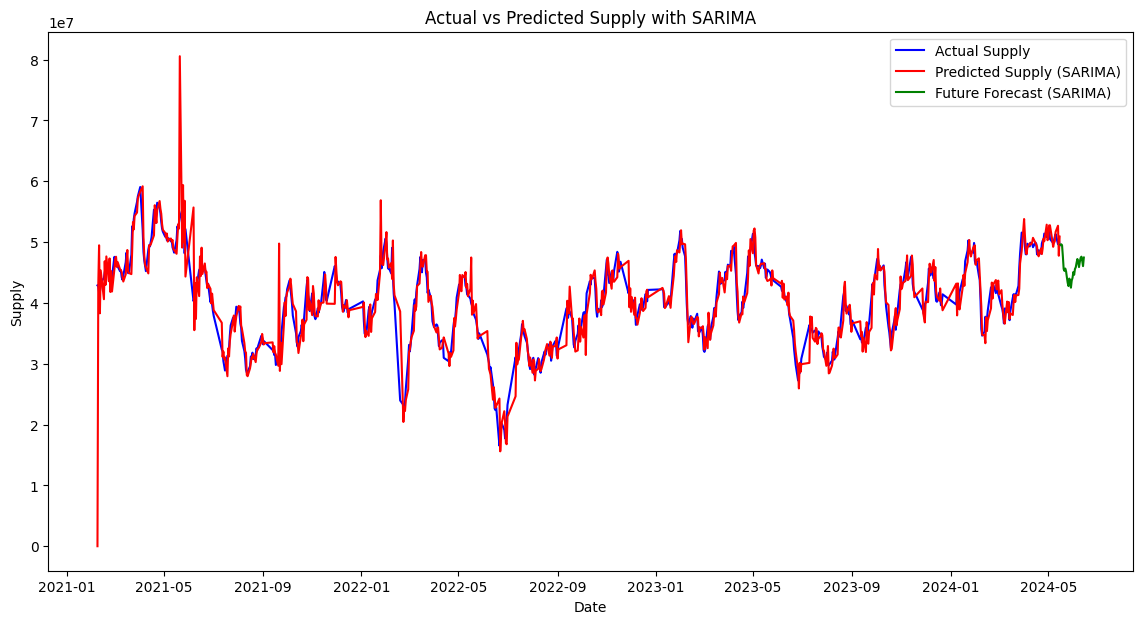

Mean Absolute Error (MAE): 1699153.0908526455
Root Mean Squared Error (RMSE): 2952266.564856421
         Date  Forecasted Supply
20 2024-06-05       4.659843e+07
21 2024-06-06       4.721686e+07
22 2024-06-07       4.669859e+07
23 2024-06-08       4.589462e+07
24 2024-06-09       4.672615e+07
25 2024-06-10       4.739753e+07
26 2024-06-11       4.759883e+07
27 2024-06-12       4.692330e+07
28 2024-06-13       4.604704e+07
29 2024-06-14       4.745973e+07


In [17]:
# Fit the SARIMA model
sarima_model = SARIMAX(
    supply_data['Supply'],
    order=(3, 1, 3),            # ARIMA (p, d, q)
    seasonal_order=(1, 1, 1, 72), # Seasonal part (P, D, Q, s) with weekly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit()

# In-sample predictions
supply_data['Predicted Supply (SARIMA)'] = sarima_result.fittedvalues

# Future predictions for the next 30 days
future_forecast_sarima = sarima_result.get_forecast(steps=30)
forecast_index_sarima = pd.date_range(start=supply_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_sarima = future_forecast_sarima.predicted_mean

# Plot historical and SARIMA-predicted values
plt.figure(figsize=(14, 7))
plt.plot(supply_data['Supply'], label='Actual Supply', color='blue')
plt.plot(supply_data['Predicted Supply (SARIMA)'], label='Predicted Supply (SARIMA)', color='red')
plt.plot(forecast_index_sarima, forecast_sarima, label='Future Forecast (SARIMA)', color='green')
plt.title('Actual vs Predicted Supply with SARIMA')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()

# Calculate error metrics
mae_sarima = mean_absolute_error(supply_data['Supply'], supply_data['Predicted Supply (SARIMA)'])
rmse_sarima = np.sqrt(mean_squared_error(supply_data['Supply'], supply_data['Predicted Supply (SARIMA)']))

# Display error metrics and forecast
print(f"Mean Absolute Error (MAE): {mae_sarima}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima}")

# Display the last 10 days of future forecast
forecast_df_sarima = pd.DataFrame({'Date': forecast_index_sarima, 'Forecasted Supply': forecast_sarima.values})
print(forecast_df_sarima.tail(10))

In [ ]:
# high variance difference, long run time

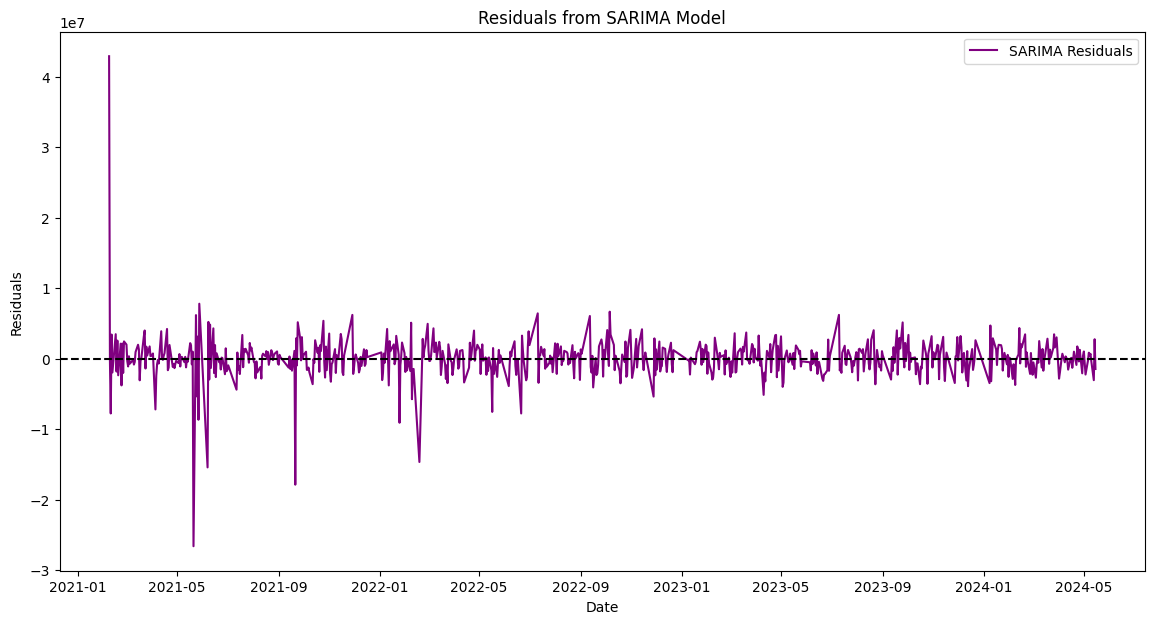

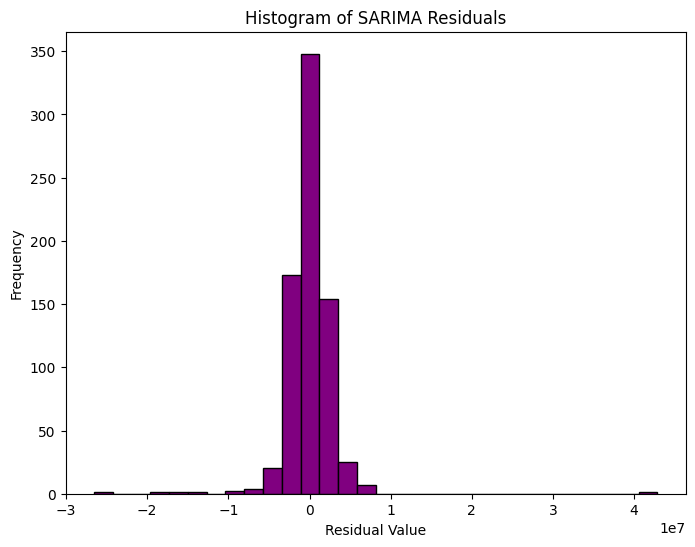

,lb_stat,lb_pvalue
10,32.958185,0.000277


In [18]:
# Extract residuals from the SARIMA model
residuals = sarima_result.resid

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='SARIMA Residuals', color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.title('Residuals from SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black')
plt.title('Histogram of SARIMA Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# Perform a Ljung-Box test to check for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
ljung_box_test


Residual Plot:

The residuals (difference between actual and predicted values) are centered around zero but exhibit spikes, indicating some unexplained variations.
Large residual spikes may indicate anomalies or sharp changes in supply that the model failed to capture.
Histogram of Residuals:

The histogram shows that the residuals are roughly symmetric around zero but not perfectly normally distributed. There are outliers, which could contribute to the overall error.